In [12]:
import cv2
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('Color_img.png')

In [14]:
if img is None:
    print("Image not found")
    exit()

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
dark_img = cv2.convertScaleAbs(img, alpha=0.5, beta=0)

In [17]:
bright_img = cv2.convertScaleAbs(img, alpha=1.5, beta=50)

In [18]:
low_contrast = cv2.convertScaleAbs(img, alpha=0.5, beta=50)

In [19]:
ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])
equalized_img = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

In [20]:
def plot_image_hist(image, title, position):

    plt.subplot(4,2,position)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    plt.subplot(4,2,position+1)
    colors = ('r','g','b')

    for i, col in enumerate(colors):
        hist = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(hist, color=col)

    plt.title(title + " Histogram")

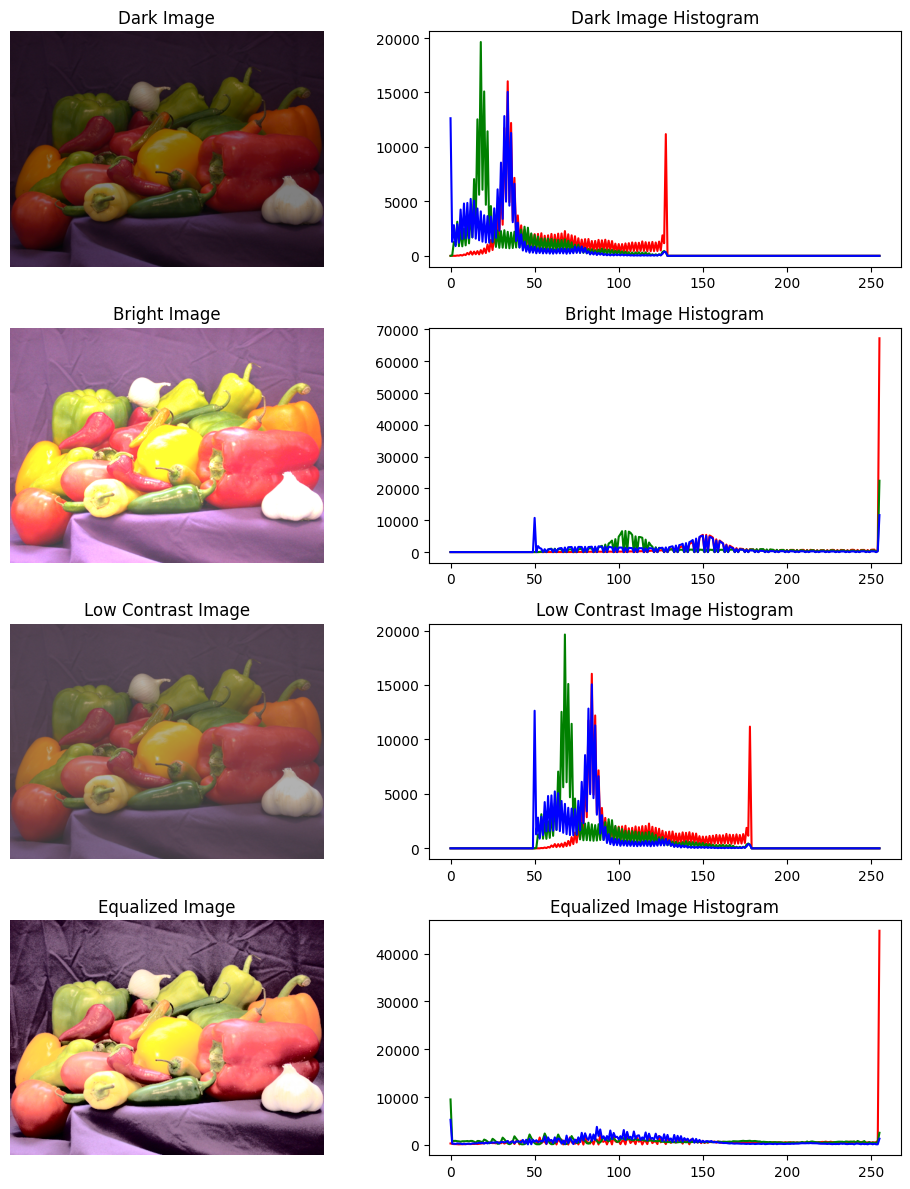

In [21]:
plt.figure(figsize=(10,12))

plot_image_hist(dark_img, "Dark Image", 1)
plot_image_hist(bright_img, "Bright Image", 3)
plot_image_hist(low_contrast, "Low Contrast Image", 5)
plot_image_hist(equalized_img, "Equalized Image", 7)

plt.tight_layout()
plt.show()